In [1]:
import pandas as pd
import os
from pathlib import Path
from os import listdir
from os.path import isdir, join
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
###----- Get dir & load / reload packages
try:
    code_dir
except NameError:
    print("Start")
    code_dir = os.getcwd()
    base_dir = code_dir.replace("/plotting_codes","")
    tools_dir = base_dir + "/tools"
    out_dir = base_dir + '/9_Figures/9_Meta'

else:
    print("Reload")

Start


In [3]:
def compile_sig_up_dn(diff_dict, cp_names, in_df, fc_col, pval_col, fc_cutoff=0, pval_cutoff=0.05):
    sig_df = in_df[in_df[pval_col] <= pval_cutoff]
    sig_df_up = sig_df[sig_df[fc_col] > fc_cutoff]
    sig_df_dn = sig_df[sig_df[fc_col] < -fc_cutoff]
    diff_dict[cp_names[0]] = set([x for x in sig_df_up.index.tolist() if str(x) != 'nan'])
    diff_dict[cp_names[1]] = set([x for x in sig_df_dn.index.tolist() if str(x) != 'nan'])
    print("%s: %s"%(cp_names[0], len(diff_dict[cp_names[0]])),"%s: %s"%(cp_names[1], len(diff_dict[cp_names[1]])))
    return(diff_dict)

In [4]:
def jaccard_distance(set_1, set_2):
    intersection = set_1 & set_2
    union = set_1 | set_2
    return(len(intersection) / len(union))

In [5]:
def sm(set_1, set_2): #Szymkiewicz–Simpson coefficient
    intersection = set_1 & set_2
    return(len(intersection) / min(len(set_1), len(set_2)))

In [6]:
ref_dir = '/media/pipkin/ROCKET-PRO/T_cell_signature_Reference'

In [7]:
diff_dict = {}

In [8]:
###----- Il2 regulated genes
il2ra_d6_file = base_dir + '/1_IL2RAKO/1_Scanpy/0-all_Scanpy_out/2_DE/KO_vs_WT/CD25WT/CD25WT_vs_CD25KO_differential.csv'
il2ra_d6_df = pd.read_csv(il2ra_d6_file, index_col=0)

il2ra_48h_file = base_dir + '/2_IL2RAKO_Nascent/3_DEseq2/WT_48h_vs_KO_48h.csv'
il2ra_48h_df = pd.read_csv(il2ra_48h_file, index_col=0)

il2ra_24h_file = base_dir + '/2_IL2RAKO_Nascent/3_DEseq2/WT_24h_vs_KO_24h.csv'
il2ra_24h_df = pd.read_csv(il2ra_24h_file, index_col=0)

ref_il2_file = ref_dir + '/2019_mouse_CD8_analysis/DEseq_out/GSE68056_WT_vs_Il2raKO_gn.csv'
ref_il2_df = pd.read_csv(ref_il2_file, index_col=0)

diff_dict = compile_sig_up_dn(diff_dict, ["Il2ra_d6_promoted", "Il2ra_d6_repressed"], il2ra_d6_df, 
                              't-test_overestim_var_logfc','t-test_overestim_var_padj', 0, 0.1)
diff_dict = compile_sig_up_dn(diff_dict, ["Il2ra_48h_promoted", "Il2ra_48h_repressed"], il2ra_48h_df, 
                              'log2FoldChange','pvalue')
diff_dict = compile_sig_up_dn(diff_dict, ["Il2ra_24h_promoted", "Il2ra_24h_repressed"], il2ra_24h_df, 
                              'log2FoldChange','pvalue')
diff_dict = compile_sig_up_dn(diff_dict, ["Il2ra_ref_promoted", "Il2ra_ref_repressed"], ref_il2_df, 
                              'log2FoldChange','pvalue')

Il2ra_d6_promoted: 2160 Il2ra_d6_repressed: 337
Il2ra_48h_promoted: 1405 Il2ra_48h_repressed: 1126
Il2ra_24h_promoted: 350 Il2ra_24h_repressed: 908
Il2ra_ref_promoted: 1428 Il2ra_ref_repressed: 930


In [9]:
###----- Other TF regulated genes
Blimp1_file = ref_dir + '/2019_mouse_CD8_analysis/DEseq_out/GSE68056_WT_vs_Blimp1KO_gn.csv'
Blimp1_df = pd.read_csv(Blimp1_file, index_col=0)

Blimp1_file2 = ref_dir + '/2019_mouse_CD8_analysis/DEseq_out/GSE70813_WT_vs_Blimp1KO_gn.csv'
Blimp1_df2 = pd.read_csv(Blimp1_file2, index_col=0)

Tbet_file = ref_dir + '/2019_mouse_CD8_analysis/DEseq_out/GSE68056_WT_vs_Tbx21KO_gn.csv'
Tbet_df = pd.read_csv(Tbet_file, index_col=0)

Hobit_file = ref_dir + '/2019_mouse_CD8_analysis/DEseq_out/GSE70813_WT_vs_HobitKO_gn.csv'
Hobit_df = pd.read_csv(Hobit_file, index_col=0)

Tcf7_file = ref_dir + '/2019_mouse_CD8_analysis/DE_from_SUP/WuTuoqi_Tcf7KO_vs_WT_gn.csv'
Tcf7_df = pd.read_csv(Tcf7_file, index_col=0)

Tcf7_file2 = ref_dir + '/2019_mouse_CD8_analysis/DE_from_SUP/WuTuoqi_TCF1OE_vs_WT_gn.csv'
Tcf7_df2 = pd.read_csv(Tcf7_file2, index_col=0)

Tox_file = ref_dir + '/2019_mouse_CD8_analysis/DE_from_SUP/KhanOmar_ToxKO_vs_WT_gn.csv'
Tox_df = pd.read_csv(Tox_file, index_col=0)

Tox_file2 = ref_dir + '/2019_mouse_CD8_analysis/DE_from_SUP/KhanOmar_ToxOE_vs_WT_gn.csv'
Tox_df2 = pd.read_csv(Tox_file2, index_col=0)

Klf2_file = ref_dir + '/2019_mouse_CD8_analysis/DE_from_SUP/PrestonGavin_Klf2_vs_WT_gn.csv'
Klf2_df = pd.read_csv(Klf2_file, index_col=0)


diff_dict = compile_sig_up_dn(diff_dict, ["Blimp1_ref_promoted", "Blimp1_repressed"], Blimp1_df, 
                              'log2FoldChange','pvalue')
diff_dict = compile_sig_up_dn(diff_dict, ["Blimp1_ref_promoted2", "Blimp1_repressed2"], Blimp1_df2, 
                              'log2FoldChange','pvalue')
diff_dict = compile_sig_up_dn(diff_dict, ["Tbet_ref_promoted", "Tbet_ref_repressed"], Tbet_df, 
                              'log2FoldChange','pvalue')
diff_dict = compile_sig_up_dn(diff_dict, ["Hobit_ref_promoted", "Hobit_ref_repressed"], Hobit_df, 
                              'log2FoldChange','pvalue')
diff_dict = compile_sig_up_dn(diff_dict, ["Tcf7_ref_repressed", "Tcf7_ref_promoted"], Tcf7_df, 
                              'log2FoldChange','p-value')
diff_dict = compile_sig_up_dn(diff_dict, ["Tcf7_ref_promoted2", "Tcf7_ref_repressed2"], Tcf7_df2, 
                              'log2FoldChange','p-value')
diff_dict = compile_sig_up_dn(diff_dict, ["Tox_ref_repressed", "Tox_ref_promoted"], Tox_df, 
                              'log2FoldChange','padj')
diff_dict = compile_sig_up_dn(diff_dict, ["Tox_ref_promoted2", "Tox_ref_repressed2"], Tox_df2, 
                              'log2FoldChange','padj')
diff_dict = compile_sig_up_dn(diff_dict, ["Klf2_ref_promoted", "Klf2_ref_repressed"], Klf2_df, 
                              'log2FoldChange','pvalue')

Blimp1_ref_promoted: 620 Blimp1_repressed: 325
Blimp1_ref_promoted2: 160 Blimp1_repressed2: 195
Tbet_ref_promoted: 931 Tbet_ref_repressed: 703
Hobit_ref_promoted: 125 Hobit_ref_repressed: 143
Tcf7_ref_repressed: 23 Tcf7_ref_promoted: 43
Tcf7_ref_promoted2: 256 Tcf7_ref_repressed2: 272
Tox_ref_repressed: 1171 Tox_ref_promoted: 1932
Tox_ref_promoted2: 1672 Tox_ref_repressed2: 1375
Klf2_ref_promoted: 492 Klf2_ref_repressed: 164


In [10]:
###----- Brg1 regulated genes
brg1_file = base_dir + '/4_Runx3_Brg1_Meta/1_Brg1_RNA/shBrg1_vs_shCd19_gn.csv'
ccnt1_file = base_dir + '/4_Runx3_Brg1_Meta/1_Brg1_RNA/shCcnt1_vs_shCd19_gn.csv'

brg1_df = pd.read_csv(brg1_file, index_col=0)
ccnt1_df = pd.read_csv(ccnt1_file, index_col=0)

diff_dict = compile_sig_up_dn(diff_dict, ["Brg1_repressed", "Brg1_promoted"], brg1_df, 
                              'log2FoldChange','pvalue')
diff_dict = compile_sig_up_dn(diff_dict, ["Ccnt1_repressed", "Ccnt1_promoted"], ccnt1_df, 
                              'log2FoldChange','pvalue')

Brg1_repressed: 1806 Brg1_promoted: 1670
Ccnt1_repressed: 673 Ccnt1_promoted: 570


In [11]:
###----- Runx3 genes
runx3_dir = base_dir + '/4_Runx3_Brg1_Meta/1_Runx3KO_RNA/DEseq2'

runx3_D5EEC_file = runx3_dir + '/WangDapeng_D5EEC---Runx3KO_vs_WT_gn.csv'
runx3_D5EEC_df = pd.read_csv(runx3_D5EEC_file, index_col=0)

runx3_D5SLEC_file = runx3_dir + '/WangDapeng_D5SLEC---Runx3KO_vs_WT_gn.csv'
runx3_D5SLEC_df = pd.read_csv(runx3_D5SLEC_file, index_col=0)

runx3_D8EEC_file = runx3_dir + '/WangDapeng_D8EEC---Runx3KO_vs_WT_gn.csv'
runx3_D8EEC_df = pd.read_csv(runx3_D8EEC_file, index_col=0)

runx3_D8MPEC_file = runx3_dir + '/WangDapeng_D8MPEC---Runx3KO_vs_WT_gn.csv'
runx3_D8MPEC_df = pd.read_csv(runx3_D8MPEC_file, index_col=0)

runx3_D8SLEC_file = runx3_dir + '/WangDapeng_D8SLEC---Runx3KO_vs_WT_gn.csv'
runx3_D8SLEC_df = pd.read_csv(runx3_D8SLEC_file, index_col=0)

diff_dict = compile_sig_up_dn(diff_dict, ["runx3_D5EEC_repressed", "runx3_D5EEC_promoted"], runx3_D5EEC_df, 
                              'log2FoldChange','pvalue')
diff_dict = compile_sig_up_dn(diff_dict, ["runx3_D5SLEC_repressed", "runx3_D5SLEC_promoted"], runx3_D5SLEC_df, 
                              'log2FoldChange','pvalue')
diff_dict = compile_sig_up_dn(diff_dict, ["runx3_D8EEC_repressed", "runx3_D8EEC_promoted"], runx3_D8EEC_df, 
                              'log2FoldChange','pvalue')
diff_dict = compile_sig_up_dn(diff_dict, ["runx3_D8SLEC_repressed", "runx3_D8SLEC_promoted"], runx3_D8SLEC_df, 
                              'log2FoldChange','pvalue')
diff_dict = compile_sig_up_dn(diff_dict, ["runx3_D8MPEC_repressed", "runx3_D8MPEC_promoted"], runx3_D8MPEC_df, 
                              'log2FoldChange','pvalue')

runx3_D5EEC_repressed: 1135 runx3_D5EEC_promoted: 1132
runx3_D5SLEC_repressed: 1945 runx3_D5SLEC_promoted: 2097
runx3_D8EEC_repressed: 872 runx3_D8EEC_promoted: 1879
runx3_D8SLEC_repressed: 714 runx3_D8SLEC_promoted: 427
runx3_D8MPEC_repressed: 1616 runx3_D8MPEC_promoted: 1606


In [12]:
###----- Chd7KO
Chd7KO_dir = base_dir + '/5_Chd7_KO_RNA/0_salmon_DE_out/2_DEseq/gene_name'

conds = ['Naive', '48h', 'EE', 'MP', 'TE', 'DP']

for i in conds:
    i_file = '%s/WT_%s-KO_%s-Salmon_gn.csv'%(Chd7KO_dir, i,i)
    i_df = pd.read_csv(i_file, index_col=0)
    diff_dict = compile_sig_up_dn(diff_dict, ["Chd7_%s_promoted"%i, "Chd7_%s_repressed"%i], i_df, 
                              'log2FoldChange','pvalue')

Chd7_Naive_promoted: 1211 Chd7_Naive_repressed: 2080
Chd7_48h_promoted: 586 Chd7_48h_repressed: 432
Chd7_EE_promoted: 544 Chd7_EE_repressed: 561
Chd7_MP_promoted: 591 Chd7_MP_repressed: 613
Chd7_TE_promoted: 631 Chd7_TE_repressed: 917
Chd7_DP_promoted: 648 Chd7_DP_repressed: 610


In [19]:
###----- Chd7RNAi
if True:
    Chd7RNAi_file = base_dir + '/5_Chd7_shRNA_RNA/1_DEseq2_merge_shChd7/Ctrl_vs_Chd7_gn.csv'
    Chd7RNAi_df = pd.read_csv(Chd7RNAi_file)

    diff_dict = compile_sig_up_dn(diff_dict, ["Chd7_D5_promoted", "Chd7_D5_repressed"], Chd7RNAi_df, 
                                  'log2FoldChange','pvalue', 0, 0.1)

Chd7_D5_promoted: 789 Chd7_D5_repressed: 768


In [20]:
###----- Chd7RNAi sep
if True:  
    Chd7RNAi_sep_dir = base_dir + '/5_Chd7_shRNA_RNA/1_DEseq2'

    conds = ['Chd7_1', 'Chd7_2', 'Chd7_3']

    for i in conds:
        i_file = "%s/%s_vs_Ctrl.csv"%(Chd7RNAi_sep_dir, i)
        i_df = pd.read_csv(i_file)
        diff_dict = compile_sig_up_dn(diff_dict, ['%s_Chd7_D5_repressed'%i, '%s_Chd7_D5_promoted'%i], i_df,
                                                 'log2FoldChange','pvalue', 0, 0.1)


Chd7_1_Chd7_D5_repressed: 379 Chd7_1_Chd7_D5_promoted: 514
Chd7_2_Chd7_D5_repressed: 551 Chd7_2_Chd7_D5_promoted: 769
Chd7_3_Chd7_D5_repressed: 381 Chd7_3_Chd7_D5_promoted: 435


In [25]:
types_list = ['Il2ra_ref_promoted', 'Il2ra_ref_repressed',
              'Il2ra_d6_promoted', 'Il2ra_d6_repressed', 
              'Il2ra_24h_promoted', 'Il2ra_24h_repressed', 'Il2ra_48h_promoted', 'Il2ra_48h_repressed',  
              'Brg1_repressed', 'Brg1_promoted', 'Ccnt1_repressed', 'Ccnt1_promoted', 
              'runx3_D5EEC_promoted', 'runx3_D5EEC_repressed', 
              'runx3_D5SLEC_promoted', 'runx3_D5SLEC_repressed', 
              'runx3_D8EEC_promoted', 'runx3_D8EEC_repressed', 
              'runx3_D8SLEC_promoted', 'runx3_D8SLEC_repressed', 
              'runx3_D8MPEC_promoted', 'runx3_D8MPEC_repressed', 
              "runx3_D5EEC_repressed", "runx3_D5EEC_promoted",
              "Blimp1_ref_promoted", "Blimp1_repressed", "Blimp1_ref_promoted2", "Blimp1_repressed2", 
              "Tbet_ref_promoted", "Tbet_ref_repressed", 
              "Hobit_ref_promoted", "Hobit_ref_repressed",
              "Tcf7_ref_repressed", "Tcf7_ref_promoted", "Tcf7_ref_repressed2", "Tcf7_ref_promoted2", 
              "Tox_ref_repressed", "Tox_ref_promoted", "Tox_ref_repressed2", "Tox_ref_promoted2",
              "Klf2_ref_promoted", "Klf2_ref_repressed",
               'Chd7_1_Chd7_D5_promoted', 'Chd7_1_Chd7_D5_repressed',
               'Chd7_2_Chd7_D5_promoted', 'Chd7_2_Chd7_D5_repressed',
               'Chd7_3_Chd7_D5_promoted', 'Chd7_3_Chd7_D5_repressed',
              # 'Chd7_D5_promoted', 'Chd7_D5_repressed', 
              'Chd7_Naive_promoted', 'Chd7_Naive_repressed', 
              'Chd7_DP_promoted', 'Chd7_DP_repressed', 'Chd7_48h_promoted', 'Chd7_48h_repressed', 
              'Chd7_EE_promoted', 'Chd7_EE_repressed', 'Chd7_MP_promoted', 'Chd7_MP_repressed', 
              'Chd7_TE_promoted', 'Chd7_TE_repressed']

promoted_types_list = [x for x in types_list if 'promoted' in x]
repressed_types_list = [x for x in types_list if 'repressed' in x]


types_slt_list = ['Il2ra_ref_promoted', 'Il2ra_ref_repressed',
              'Il2ra_d6_promoted', 'Il2ra_d6_repressed', 
              'Il2ra_24h_promoted', 'Il2ra_24h_repressed', 'Il2ra_48h_promoted', 'Il2ra_48h_repressed',  
              'Brg1_repressed', 'Brg1_promoted', 'Ccnt1_repressed', 'Ccnt1_promoted', 
              'runx3_D5EEC_promoted', 'runx3_D5EEC_repressed', 
              'runx3_D5SLEC_promoted', 'runx3_D5SLEC_repressed', 
              'runx3_D8EEC_promoted', 'runx3_D8EEC_repressed', 
              'runx3_D8SLEC_promoted', 'runx3_D8SLEC_repressed', 
              'runx3_D8MPEC_promoted', 'runx3_D8MPEC_repressed', 
              "runx3_D5EEC_repressed", "runx3_D5EEC_promoted",
              'Chd7_Naive_promoted', 'Chd7_Naive_repressed', 
              'Chd7_DP_promoted', 'Chd7_DP_repressed', 'Chd7_48h_promoted', 'Chd7_48h_repressed', 
              'Chd7_EE_promoted', 'Chd7_EE_repressed', 'Chd7_MP_promoted', 'Chd7_MP_repressed', 
              'Chd7_TE_promoted', 'Chd7_TE_repressed']

promoted_slt_types_list = [x for x in types_slt_list if 'promoted' in x]
repressed_slt_types_list = [x for x in types_slt_list if 'repressed' in x]

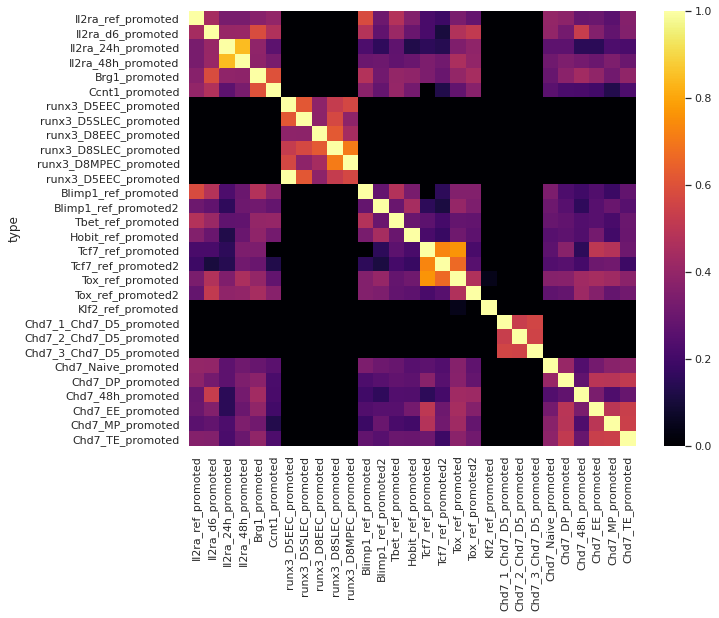

In [26]:
promoted_similarity_df = pd.DataFrame({'type':promoted_types_list}).set_index('type')
for i in promoted_types_list:
    i_score = []
    for j in promoted_types_list:
        ij_similarity = sm(diff_dict[i], diff_dict[j])
        i_score.append(ij_similarity)
    promoted_similarity_df[i] = i_score

sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(np.sqrt(promoted_similarity_df), cmap='inferno')

promoted_similarity_df.to_csv("%s/meta_promoted.csv"%out_dir)
plt.savefig("%s/meta_promoted.png"%out_dir)

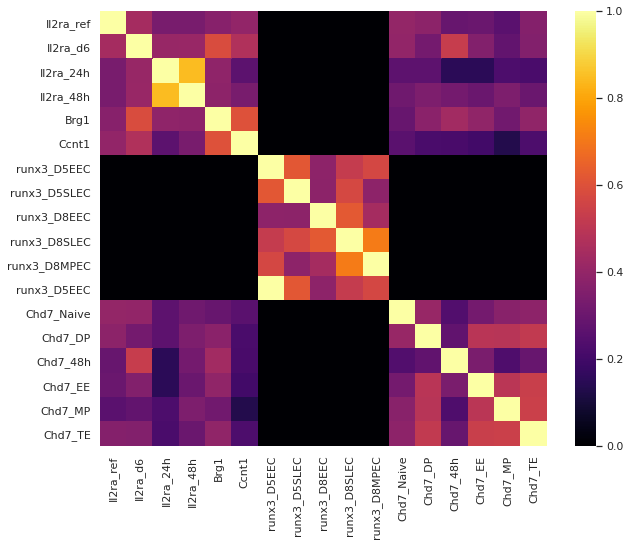

In [19]:
promoted_slt_similarity_df = pd.DataFrame({'type':promoted_slt_types_list}).set_index('type')
for i in promoted_slt_types_list:
    i_score = []
    for j in promoted_slt_types_list:
        ij_similarity = sm(diff_dict[i], diff_dict[j])
        i_score.append(ij_similarity)
    promoted_slt_similarity_df[i] = i_score
    
promoted_slt_similarity_df.index = [x.replace("_promoted","") for x in promoted_slt_similarity_df.index]
promoted_slt_similarity_df.columns = [x.replace("_promoted","") for x in promoted_slt_similarity_df.columns]

sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(np.sqrt(promoted_slt_similarity_df), cmap='inferno')

promoted_slt_similarity_df.to_csv("%s/meta_promoted_slt.csv"%out_dir)
plt.savefig("%s/meta_promoted_slt.png"%out_dir)

plt.show()
plt.close()

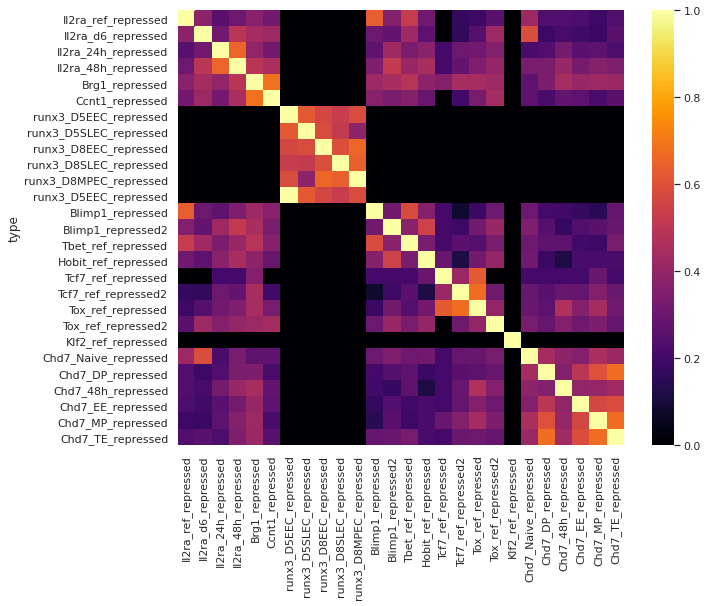

In [20]:
repressed_similarity_df = pd.DataFrame({'type':repressed_types_list}).set_index('type')
for i in repressed_types_list:
    i_score = []
    for j in repressed_types_list:
        ij_similarity = sm(diff_dict[i], diff_dict[j])
        i_score.append(ij_similarity)
    repressed_similarity_df[i] = i_score

sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(np.sqrt(repressed_similarity_df), cmap='inferno')

repressed_similarity_df.to_csv("%s/meta_repressed.csv"%out_dir)
plt.savefig("%s/meta_repressed.png"%out_dir)

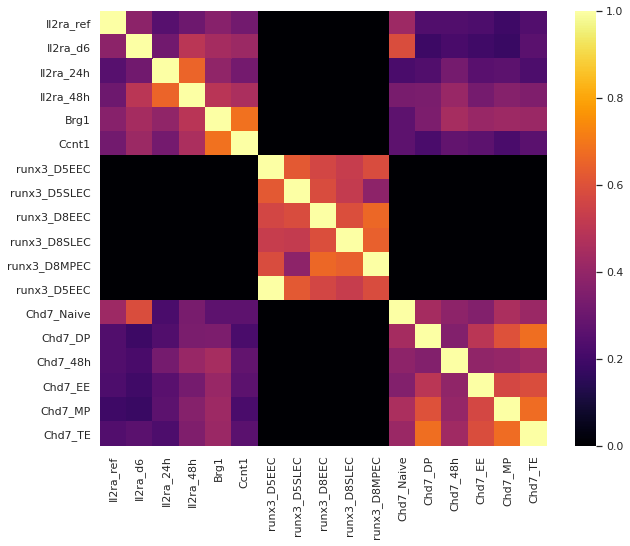

In [21]:
repressed_slt_similarity_df = pd.DataFrame({'type':repressed_slt_types_list}).set_index('type')
for i in repressed_slt_types_list:
    i_score = []
    for j in repressed_slt_types_list:
        ij_similarity = sm(diff_dict[i], diff_dict[j])
        i_score.append(ij_similarity)
    repressed_slt_similarity_df[i] = i_score
    
repressed_slt_similarity_df.index = [x.replace("_repressed","") for x in repressed_slt_similarity_df.index]
repressed_slt_similarity_df.columns = [x.replace("_repressed","") for x in repressed_slt_similarity_df.columns]

sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(np.sqrt(repressed_slt_similarity_df), cmap='inferno')

repressed_slt_similarity_df.to_csv("%s/meta_repressed_slt.csv"%out_dir)
plt.savefig("%s/meta_repressed_slt.png"%out_dir)

plt.show()
plt.close()

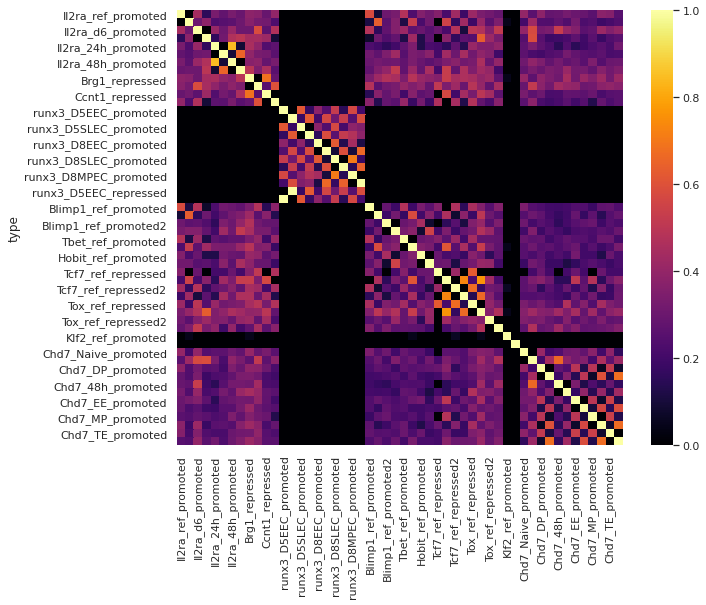

In [22]:
similarity_df = pd.DataFrame({'type':types_list}).set_index('type')
for i in types_list:
    i_score = []
    for j in types_list:
        ij_similarity = sm(diff_dict[i], diff_dict[j])
        i_score.append(ij_similarity)
    similarity_df[i] = i_score

sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(np.sqrt(similarity_df), cmap='inferno')

similarity_df.to_csv("%s/meta_promoted-repressed.csv"%out_dir)
plt.savefig("%s/meta_promoted-repressed.png"%out_dir)